### 네이버 지식 IN 병명으로 이진 분류하기 - 정신과
- dataset: './data/'
- feature: text data
- label: others, psychiatry
- frame work: Pytorch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

import torch
from torch.utils.data import TensorDataset, DataLoader

import work_rnn_func as rnn

In [2]:
TRAIN_PATH = './train_data_df.csv'
TEST_PATH = './test_data_df.csv'
VOCAB_PATH = './psychiatry_vocab.csv'

In [3]:
train_data_df = pd.read_csv(TRAIN_PATH, encoding='utf-8')
test_data_df = pd.read_csv(TEST_PATH, encoding='utf-8')
vocab_df = pd.read_csv(VOCAB_PATH, encoding='utf-8')

In [4]:
vocab = {}
for i in range(len(vocab_df)):
    vocab[vocab_df.loc[i, 'key']] = vocab_df.loc[i, 'value']
vocab

{'PAD': 0,
 'OOV': 1,
 '정신과': 2,
 '약': 3,
 '요': 4,
 '은': 5,
 '생각': 6,
 '우울': 7,
 '안': 8,
 '상담': 9,
 '도': 10,
 '감': 11,
 '병원': 12,
 '정': 13,
 '중': 14,
 '서': 15,
 '고': 16,
 '건가': 17,
 '인데': 18,
 '되는': 19,
 '복용': 20,
 '는': 21,
 '살이': 22,
 '먹어도': 23,
 '많이': 24,
 '처방': 25,
 '주사': 26,
 '그냥': 27,
 '건지': 28,
 '만': 29,
 '다': 30,
 '너무': 31,
 '있는': 32,
 '하는': 33,
 '정도': 34,
 '인': 35,
 '방정': 36,
 '건': 37,
 '거': 38,
 '진단': 39,
 '입니다': 40,
 '수': 41,
 '찐': 42,
 '때문': 43,
 '이나': 44,
 '있나요': 45,
 '맞아도': 46,
 '가면': 47,
 '의사': 48,
 '한': 49,
 '정신': 50,
 '받으면': 51,
 '심해서': 52,
 '선생님': 53,
 '적': 54,
 '과를': 55,
 '진정': 56,
 '상태': 57,
 '정말': 58,
 '가야': 59,
 '공부': 60,
 '날': 61,
 '번': 62,
 '죽': 63,
 '충': 64,
 '대한': 65,
 '가끔': 66,
 '치료': 67,
 '하다': 68,
 '죽고싶다는': 69,
 '동이': 70,
 '나아져서': 71,
 '다녀': 72,
 '이랑': 73,
 '하나요': 74,
 '되었습니다': 75,
 '뭐': 76,
 '머리': 77,
 '같은': 78,
 '처음': 79,
 '종종': 80,
 '되나요': 81,
 '우울증': 82,
 '사진': 83,
 '기분': 84,
 '감기': 85,
 '되요': 86,
 '못': 87,
 '가기': 88,
 '랑': 89,
 '기록': 90,
 '문제': 91,
 '할'

In [5]:
train_data = train_data_df.sample(frac=0.9, random_state=rnn.RANDOM_STATE)
val_data = train_data_df.drop(train_data.index)
test_data = test_data_df.sample(frac=1, random_state=rnn.RANDOM_STATE)

print(f"train size: {len(train_data)}")
print(f"validation size: {len(val_data)}")
print(f"test size: {len(test_data)}")

train size: 15925
validation size: 1769
test size: 1983


In [6]:
train_ids = train_data.padding_50.apply(lambda x: ast.literal_eval(x)).to_list()
val_ids = val_data.padding_50.apply(lambda x: ast.literal_eval(x)).to_list()
test_ids = test_data.padding_50.apply(lambda x: ast.literal_eval(x)).to_list()

print(train_ids[0])
print(val_ids[0])
print(test_ids[0])

[308, 326, 329, 323, 322, 13, 233, 260, 299, 327, 43, 330, 13, 331, 56, 332, 328, 325, 333, 25, 324, 23, 19, 3, 334, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 2037, 1, 508, 1, 1176, 260, 12, 31, 758, 1, 1, 5114, 400, 24, 5402, 1, 1, 5114, 400, 92, 335, 201, 1, 1949, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1821, 5529, 1504, 941, 501, 5981, 104, 780, 136, 1, 858, 708, 2300, 10, 1, 344, 485, 360, 670, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [7]:
train_ids = torch.tensor(train_ids)
val_ids = torch.tensor(val_ids)
test_ids = torch.tensor(test_ids)

train_labels = torch.tensor(train_data.label.values, dtype=torch.float32)
val_labels = torch.tensor(val_data.label.values, dtype=torch.float32)
test_labels = torch.tensor(test_data.label.values, dtype=torch.float32)

train_datasets = TensorDataset(train_ids, train_labels)
val_datasets = TensorDataset(val_ids, val_labels)
test_datasets = TensorDataset(test_ids, test_labels)

In [8]:
n_vocab = len(vocab)
hidden_dim = 64
embedding_dim = 128
n_layer = 2

lstm_model = rnn.BCRNNModels(n_vocab, hidden_dim, embedding_dim, n_layer)

In [16]:
print(lstm_model)
rnn.summary(lstm_model)

BCRNNModels(
  (embedding): Embedding(8693, 128, padding_idx=0)
  (model): LSTM(128, 64, num_layers=2, batch_first=True, dropout=0.25, bidirectional=True)
  (classifier): Linear(in_features=128, out_features=1, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


Layer (type:depth-idx)                   Param #
BCRNNModels                              --
├─Embedding: 1-1                         1,112,704
├─LSTM: 1-2                              198,656
├─Linear: 1-3                            129
├─Dropout: 1-4                           --
Total params: 1,311,489
Trainable params: 1,311,489
Non-trainable params: 0

In [9]:
EPOCHS = 100

loss_dict, acc_dict, f1_dict = rnn.training(lstm_model, train_datasets, val_datasets, EPOCHS)

saved first
[    5/  100]  [Train]         loss: 0.003368, score: 100.006279 %
[    5/  100]  [Validation]    loss: 0.002483, score: 10.090446 %

[    6/  100] saved model
[    7/  100] saved model
[    8/  100] saved model
[   10/  100]  [Train]         loss: 0.000020, score: 100.069069 %
[   10/  100]  [Validation]    loss: 0.001704, score: 10.152628 %

[   10/  100] saved model
[   11/  100] saved model
[   13/  100] saved model
[   14/  100] saved model
[   15/  100]  [Train]         loss: 0.000004, score: 100.069069 %
[   15/  100]  [Validation]    loss: 0.001851, score: 10.152628 %

[   15/  100] saved model
[   16/  100] saved model
성능 및 손실의 개선이 없어서 학습을 중단합니다.

[   16/  100]  [Train]         loss: 0.000003, score: 100.069069 %
[   16/  100]  [Validation]    loss: 0.001879, score: 10.152630 %



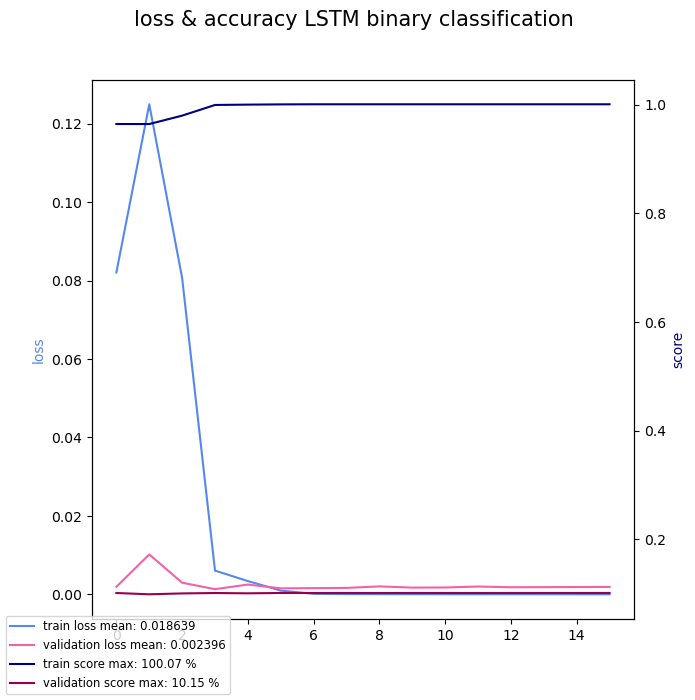

In [10]:
rnn.draw_two_plot(loss_dict, acc_dict, 'loss & accuracy')

In [13]:
test_datasets.tensors[0], test_datasets.tensors[1]

(tensor([[1821, 5529, 1504,  ...,    0,    0,    0],
         [ 121,  494, 6069,  ...,  991,  311,  506],
         [  83,   32,    2,  ...,    0,    0,    0],
         ...,
         [  61,    1,  872,  ...,    0,    0,    0],
         [  83,   32,    2,  ...,    0,    0,    0],
         [   2,    3,    5,  ...,    0,    0,    0]]),
 tensor([0., 0., 1.,  ..., 0., 1., 1.]))

In [25]:
def testing(model, X_data, y_data):
    y_data = y_data.unsqueeze(1).float()
    with torch.no_grad():
        
        pred = model(X_data)
        
        loss = rnn.nn.BCELoss()(pred, y_data)
        acc_score = rnn.BinaryAccuracy()(pred, y_data)
        f1_score = rnn.BinaryF1Score()(pred, y_data)
        mat = rnn.BinaryConfusionMatrix()(pred, y_data)
        
    return loss, acc_score, f1_score, mat

In [30]:
lstm_model = torch.load('./model/bc_lstm_clf_model.pth', weights_only=False)

In [31]:
test_loss, test_acc, test_f1, test_mat = testing(lstm_model, test_datasets.tensors[0], test_datasets.tensors[1])

test loss: 0.28660860657691956
test accuracy: 97.175995 %
test f1 score: 97.107437 %


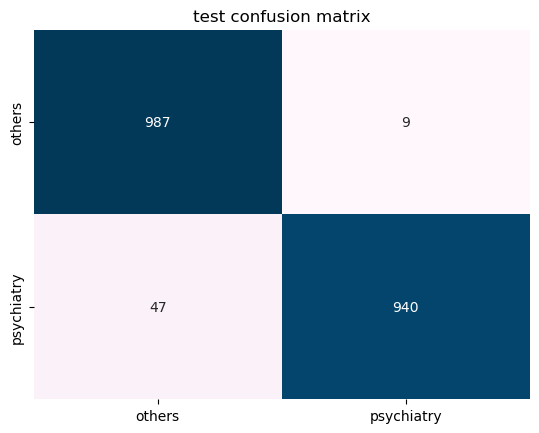

In [32]:
print(f"test loss: {test_loss}")
print(f"test accuracy: {test_acc*100:.6f} %")
print(f"test f1 score: {test_f1*100:.6f} %")

sns.heatmap(test_mat, annot=True, fmt=f'.0f', cbar=False, cmap='PuBu')
plt.title('test confusion matrix')
plt.xticks(np.arange(0, 2)+0.5, labels=[rnn.LABEL_TRANSLATE[i] for i in range(2)])
plt.yticks(np.arange(0, 2)+0.5, labels=[rnn.LABEL_TRANSLATE[i] for i in range(2)])
plt.show()

In [42]:
def predict(model, x_data, y_data):
    # y_data의 차원을 확인하고 unsqueeze가 필요한지 확인
    if len(y_data.shape) == 1:  # 1D 텐서인 경우
        y_data = y_data.unsqueeze(1)  # (N,) -> (N, 1)
    
    y_data = y_data.float()  # float형으로 변환
    x_data = x_data.unsqueeze(1)
    with torch.no_grad():
        # 예측 수행
        pred = model(x_data)
        # 0.5 이상이면 1, 미만이면 0으로 변환
        pred_labels = torch.argmax((pred > 0.5).int())
        pred_labels = [rnn.LABEL_TRANSLATE[int(label)] for label in pred_labels.flatten()]
        real_labels = [rnn.LABEL_TRANSLATE[int(label)] for label in y_data.flatten()]

    return pred_labels, real_labels


In [48]:
def predict_web(model, X_data):
    X_data = X_data.unsqueeze(1)
    with torch.no_grad():
        pred = model(X_data)
        pred_label = torch.argmax((pred > 0.5).int())
        pred_label = rnn.LABEL_TRANSLATE[int(pred_label.flatten())]
        
    return pred_label

In [49]:
pred_label = predict_web(lstm_model, test_datasets.tensors[0][0])

print(f"predict: {pred_label}")

predict: others
